In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('MTY.csv')

C:\Users\ohm\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,12,13,16,21,28,32,33,34,35,36,37,40,41,42,43,44,45,46,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(list(df.columns),)

['Column', 'Calle', 'Causa', 'Ciudad', 'Cruce', 'Fecha', 'Hora', 'ID', 'Latitud', 'Lesionados', 'Longitud', 'Mes', 'Muertos', 'No. De Infracción', 'Número  total de lesionados', 'Número total de muertos', 'Por alcohol', 'Sentido', 'Situación climática', 'Situación del Pavimento', 'Tipo de incidente', 'Tipo de involucrado', 'Tipo de vía', 'V1_Arresto', 'V1_Dictamen', 'V1_Edad', 'V1_Estatus Licencia', 'V1_Género', 'V1_No. De Fallecidos', 'V1_No. De Lesionados', 'V1_Tipo de Vehículo', 'V1_Uso de Cinturón', 'V2_Arresto', 'V2_Dictamen', 'V2_Edad', 'V2_Estatus Licencia', 'V2_Género', 'V2_No. De Fallecidos', 'V2_No. De Lesionados', 'V2_Tipo de Vehículo', 'V2_Uso de Cinturón', 'V3_Arresto', 'V3_Dictamen', 'V3_Edad', 'V3_Estatus Licencia', 'V3_Género', 'V3_No. De Fallecidos', 'V3_No. De Lesionados', 'V3_Tipo de Vehículo', 'V3_Uso de Cinturón']


# Pregunta 1: 

¿Cuáles son las 10 rutas más peligrosas del AM de Mty —aparentemente—? <br><br>
Respuesta: A continuación, se presentan las 10 rutas con más reportes de accidentes en la base de datos, por lo que aparentemente serían las más peligrosas:<br><br>
1.  MORONES PRIETO      <br>
2.  LAZARO CARDENAS     <br>
3.  GONZALITOS          <br>
4.  GARZA SADA          <br>
5.  ALFONSO REYES       <br>
6.  JOSE VASCONCELOS    <br>
7.  LEONES              <br>
8.  AV. LINCOLN         <br>
9.  CONSTITUCION        <br>
10. FIDEL VELAZQUEZ     <br>
<br><br>

# Anotaciones.
+99% de los reportes en la base de datos corresponden a los años 2016 y 2016.<br><br>
Durante eso años, 9 rutas de las 10 listadas se mantienen como las más reportadas, a excepción de Fidel Velazquez. <br><br>
Se presenta una tabla con las 10 rutas más reportadas por año.




![](TODOnew.png)

In [4]:
# Se cuentan reportes totales en BD por calle
df['Calle'].value_counts().head(10)

MORONES PRIETO      1729
LAZARO CARDENAS     1279
GONZALITOS          1229
GARZA SADA          1215
ALFONSO REYES       1153
JOSE VASCONCELOS     964
LEONES               891
AV. LINCOLN          838
CONSTITUCION         823
FIDEL VELAZQUEZ      752
Name: Calle, dtype: int64

In [5]:
# Fecha en formato adecuado
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [6]:
# Reportes por año
(pd.DatetimeIndex(df['Fecha']).year).value_counts().head(10)

2016.0    35234
2017.0    18887
2015.0       12
2019.0        9
1900.0        5
2014.0        4
2012.0        2
2000.0        2
2020.0        2
2022.0        2
Name: Fecha, dtype: int64

In [7]:
# El +99% de los reportes son de 2016 y 2016
(pd.DatetimeIndex(df['Fecha']).year).value_counts(normalize=True).head(2)

2016.0    0.650482
2017.0    0.348687
Name: Fecha, dtype: float64

In [8]:
# Todos los años
anios=(pd.DatetimeIndex(df['Fecha']).year).unique().values
anios = np.sort(anios)
anios

array([1900., 2000., 2006., 2007., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021., 2022.,   nan])

In [9]:
# Corriengo arreglo de años
anios = anios[~np.isnan(anios)]
anios = [str(int(x)) for x in anios]

In [10]:
ntop10r=len(anios)

In [11]:
# Data frame que contendrá las 10 rutas más peligrosas dpor año
top10r_df = pd.DataFrame(index=np.arange(0,10), columns=anios)

In [12]:
def calle_rep(calle, numeros):
    gi = [ '{}  #'.format(x) for x in calle ]

    fg = [gi[i] + str(numeros[i]) for i in range(0, len(gi))]
    
    return fg

In [13]:
# Genera una tabla con las 10 rutas con más reportes por año
nn=len(anios)

for i in range(nn):
    
    temp0=df.loc[df['Fecha'].dt.year == int(anios[i])]['Calle'].value_counts(normalize=False)
    
    calles=[]
    calles=calle_rep(temp0.index, temp0.values)
    #print(calles, len(calles))
    
    n=0
    n=len(calles)

    if n>10:
        top10r_df[anios[i]]=calles[0:10]
    else:
        top10r_df[anios[i]][:len(calles)]=calles

top10r_df.fillna('', inplace=True)
top10r_df

,1900,2000,2006,2007,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,librmiento qa v2 #1,Bosque de washinton #1,AV. LINCOLN #1,AV. ARTURO B. DE LA GARZA #1,JUAREZ #1,CARRETERA A GARCIA #2,DULCES NOMBRES #1,TELEFONOS #1,ACUEDUCTO #1,MORONES PRIETO #1077,MORONES PRIETO #651,PRISILIANO #1,AV Lincoln #2,PORFIRIO DIAZ #1,MIGUEL ALEMAN #1,HDA LOS GARCIA #1
1,AV. LINCOLN #1,VIRREY DE VELAZCO #1,,,,,ARCO VIAL #1,AV. SENDERO #1,DR ARROYO #1,GONZALITOS #876,LAZARO CARDENAS #488,,CARRETERA A GARCIA #1,Hacienda de Bustillos #1,,SAN MIGUEL #1
2,MANUEL ORDOÑEZ #1,,,,,,,CONCORDIA #1,CONSTITUCION #1,AV. LINCOLN #836,GARZA SADA #422,,VALLE ALEGRE #1,,,
3,LUIS DONALDO COLOSIO #1,,,,,,,BLVD DIAZ ORDAZ #1,BENITO JUAREZ #1,GARZA SADA #793,ALFONSO REYES #419,,Lincoln #1,,,
4,BLVD DIAZ ORDAZ #1,,,,,,,,MANUEL L BARRAGAN #1,LAZARO CARDENAS #791,GONZALITOS #353,,AV. PARAJES #1,,,
5,,,,,,,,,MONCLOVA #1,ALFONSO REYES #734,JOSE VASCONCELOS #319,,TITANIO #1,,,
6,,,,,,,,,RAUL SALINAS #1,JOSE VASCONCELOS #645,AV LINCOLN #282,,SOR JUANA INES DE LA CRUZ #1,,,
7,,,,,,,,,SALTILLO #1,LEONES #630,LEONES #261,,CARR A García #1,,,
8,,,,,,,,,AV. SOR JUANA INEZ DE LA CRUZ #1,RUIZ CORTINEZ #602,RUIZ CORTINES #260,,,,,
9,,,,,,,,,Jesús FERNANDEZ #1,CONSTITUCION #554,CONSTITUCION #260,,,,,


# Pregunta 2

Pregunta: ¿Cuál es el grupo de edades con el mayor número de colisiones reportados?. Explícalo gráficamente.

Respuesta: **El grupo de edad con mayores reportes es el de 25-30 años de edad**, en 2016 y 2017. Este grupo reportó mayores accidentes los días días viernes.

# Anotaciones

Se tomaron en cuenta solo los reportes del **2016** y **2017**.<br>
<br>
Se tomó en cuenta solo la **edad del conductor del vehículo 1 'V1_Edad'**.<br>
<br>
Se agruparon en edades : 0-19, 20-24, 25-29, 30-34, 45-39, 40-44, 45-50, 51-54, 55-59, 60-64, 65 --><br>



In [14]:
%matplotlib notebook

In [15]:
df['V1_Edad'] = pd.to_numeric(df['V1_Edad'], downcast="float", errors='coerce')
df['V2_Edad'] = pd.to_numeric(df['V1_Edad'], downcast="float", errors='coerce')
df['V3_Edad'] = pd.to_numeric(df['V1_Edad'], downcast="float", errors='coerce')

In [16]:
Subset2016=df.loc[df['Fecha'].dt.year == 2016]#['V1_Edad'].value_counts()
Subset2017=df.loc[df['Fecha'].dt.year == 2017]

In [17]:
Grupos_edad2016 = pd.cut(Subset2016['V1_Edad'].astype(float), bins=[0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], right=False)
Grupos_edad2017 = pd.cut(Subset2017['V1_Edad'].astype(float), bins=[0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], right=False)

In [18]:
REdades = pd.DataFrame({'2016': Grupos_edad2016.value_counts().values, 
                        '2017': Grupos_edad2017.value_counts().values}, 
                       index= Grupos_edad2016.value_counts().index)

In [19]:
# 2016
Subset2016['Fecha'] = pd.to_datetime(Subset2016['Fecha'], errors='coerce')
Subset2016['Dia']=Subset2016['Fecha'].dt.day_name()

Subset2016_2530 = Subset2016[(25<=Subset2016['V1_Edad']) & (Subset2016['V1_Edad']<=30)]


#2017
Subset2017['Fecha'] = pd.to_datetime(Subset2017['Fecha'], errors='coerce')
Subset2017['Dia']=Subset2017['Fecha'].dt.day_name()

Subset2017_2530 = Subset2017[(25<=Subset2017['V1_Edad']) & (Subset2017['V1_Edad']<=30)] 

C:\Users\ohm\AppData\Local\Temp/ipykernel_28000/3337178094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subset2016['Fecha'] = pd.to_datetime(Subset2016['Fecha'], errors='coerce')
C:\Users\ohm\AppData\Local\Temp/ipykernel_28000/3337178094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subset2016['Dia']=Subset2016['Fecha'].dt.day_name()
C:\Users\ohm\AppData\Local\Temp/ipykernel_28000/3337178094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [20]:
Subset2016['Dia'].value_counts()

Friday       5695
Thursday     5202
Saturday     5195
Monday       5114
Tuesday      5112
Wednesday    5101
Sunday       3815
Name: Dia, dtype: int64

In [21]:
Subset2017['Dia'].value_counts()

Friday       3173
Wednesday    2926
Thursday     2846
Saturday     2840
Tuesday      2808
Monday       2391
Sunday       1903
Name: Dia, dtype: int64

In [22]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#2016
Rango2530=pd.DataFrame(index=np.arange(0,7), columns=['Dia','2016'])
Rango2530['Dia']=Subset2016['Dia'].value_counts().index
Rango2530['2016']=Subset2016['Dia'].value_counts(normalize=True).values

Rango2530['Dia'] = pd.Categorical(Rango2530['Dia'], categories=cats, ordered=True)
Rango2530 = Rango2530.sort_values('Dia')
Rango2530.reset_index(inplace=True)

#2017
Rango2530_b=pd.DataFrame(index=np.arange(0,7), columns=['Dia','2017'])
Rango2530_b['Dia'] =Subset2017['Dia'].value_counts().index
Rango2530_b['2017']=Subset2017['Dia'].value_counts(normalize=True).values

Rango2530_b['Dia'] = pd.Categorical(Rango2530_b['Dia'], categories=cats, ordered=True)
Rango2530_b        = Rango2530_b.sort_values('Dia')
Rango2530_b.reset_index(inplace=True)
Rango2530['2017']=Rango2530_b['2017']

<IPython.core.display.Javascript object>


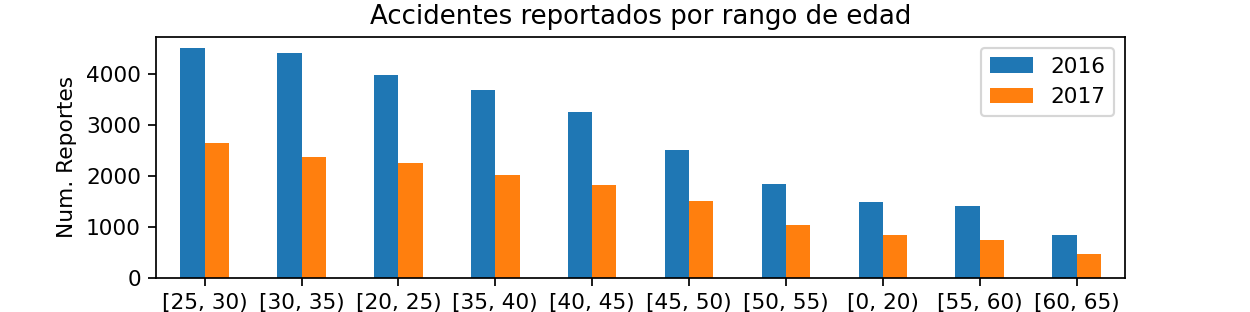

In [32]:
fig,ax = plt.subplots(figsize=(8, 2), nrows=1, ncols=1)
REdades.plot.bar(rot=0, xlabel='Rango de edades', ylabel='Num. Reportes', title='Accidentes reportados por rango de edad', ax=ax)

fig.savefig("AccidentesxRangoEdad.png")

<IPython.core.display.Javascript object>


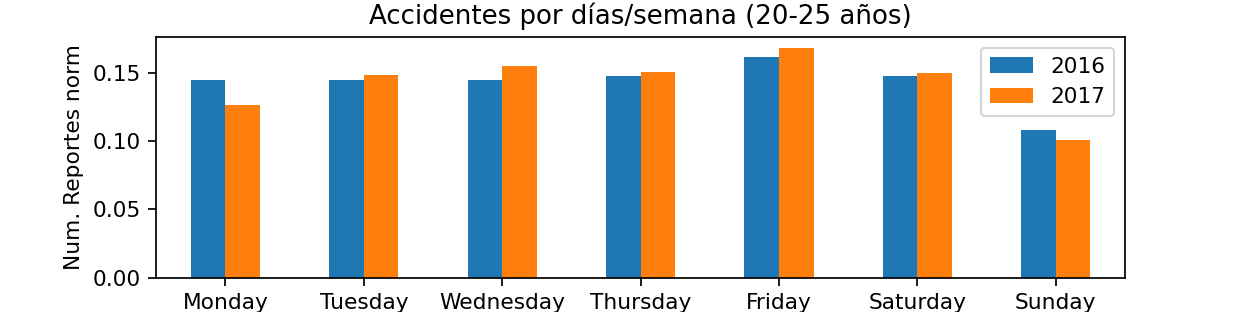

In [33]:
fig,ax1 = plt.subplots(figsize=(8, 2), nrows=1, ncols=1)
Rango2530.plot.bar(rot=0, x='Dia', y=['2016','2017'], xlabel='Dia', ylabel='Num. Reportes norm', title='Accidentes por días/semana (20-25 años)', ax=ax1)
fig.savefig("DiaSemanaAccidentes2530.png")

# Pregunta 3: 
P. ¿Cuáles serían la probabilidades de que una persona involucrada en un accidente en GS tuviera una opinión positiva sobre la ingesta de alcohol?

Respuesta: 
**Las probabilidades de que el involucrado en un accidente en GS tuviera una buena opinión —al momento del accidente— sobre la ingesta de alcohol serían muy bajas**.<br>
<br>
Durante un accidente, las personas involucradas tienden a negar el consumo de substancias (alcohol y drogas) incluso en evidente estado de alteración. El hecho de consumir sustacias y conducir ya es en sí un delito.

# Anotaciones

El total de accidentes reportados en Garza Zada es de 1215.
<br> <br>
Se asume que el alcohol solo estuvo presente en los accidentes con etiquetas: 
 'Por alcohol' ='Sí'  y 'Causa'='ESTADO ALCOHOLICO', <br><br> por lo tanto:
<br> <br>
 de 1215 accidentes reportados, en 86 de ellos se involucró alcohol, es decir, en solo el 7%.
 



In [25]:
GZ=df.loc[df['Calle'] == 'GARZA SADA']
#GZ.count #[1215 rows x 50 columns]
GZ['Causa'].value_counts()

NO GUARDAR DISTANCIA                352
Otros                               213
No Guardó Distancia                 212
INVADIR CARRIL                      176
Otro                                117
Invasión de Carril                   78
Exceso de Velocidad                  21
NO RESPETAR SEÑALAMIENTOS            10
ESTADO ALCOHOLICO                     8
No Respetó Semáforo                   7
No Respetó Señalamientos              6
Giro Indebido                         4
DAR LA VUETA EN LUGAR PROHIBIDO       3
Estado de Alcoholismo                 3
Distracción                           2
Sentido Contrario                     2
CIRCULAR EN SENTIDO CONTRARIO         1
Name: Causa, dtype: int64

In [26]:
GZ['Por alcohol'].value_counts()

No    428
Sí     82
Name: Por alcohol, dtype: int64

In [27]:
# En algunos reportes, la etiqueta 'Por alcohol' está vacia, pero la etiqueta 'Causa'='ESTADO ALCOHOLICO',
# por lo que en aquellas etiqueas 'Causa'='ESTADO ALCOHOLICO' se modificó la etiqueta 'Por alcohol'='Sí'.
# EL número de accidentes con alcohol se toman de la columna 'Por alcohol'.

GZ['Por alcohol'][GZ['Causa'].str.contains('ALCOH')] = 'Sí'

C:\Users\ohm\AppData\Local\Temp/ipykernel_28000/218129950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GZ['Por alcohol'][GZ['Causa'].str.contains('ALCOH')] = 'Sí'
C:\Users\ohm\anaconda3\envs\geo_env\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
GZ['Por alcohol'].value_counts()

No    428
Sí     86
Name: Por alcohol, dtype: int64

In [29]:
# Los reportes con etiquetas nulas se asumen como "Sin presencia de alcohol"
GZ['Por alcohol'].isnull().sum()

701

In [30]:
86*100/1215

7.078189300411522

# Pregunta 4.

**P.** ¿Por qué se utiliza la frase "aparentemente (traducción directa: parecen ser)" en la pregunta 1? <br>
**R.** <br>
$i$)  Porque (la respuesta) está en función **solo** del número de reportes. <br>
$ii$) Al parecer son las rutas más transitadas de la ciudad, pero es necesario conocer el promedio de vehículos que transitan   por periodo (día, semana, mes, etc.) y el número de accidentes durante ese periodo. De esta manera se obtiene un porcentaje o tasa de accidentes que se pueden comparar con las demás rutas. <br>


**P.** ¿Qué más necesitas saber para tener mayor confianza en la respuesta de la pregunta 1?<br>
**R.** <br>
$i$) Muestreo continuo en las rutas de interés en el mismo periodo de tiempo. Monitoreo continuo en la ciudad.<br>
$ii$) La relación entre transito de vehículos y accidentes.<br>
$iii$) Muestreo por más años.
<br><br>
¿Por qué la base de datos está incompleta para años recientes?

# Pregunta 5.

**P.** ¿Qué proyecto de modelado desarrollarías a partir de tus conclusiones? <br>
**R.** <br>
Predicción de accidentes utilizando las variables disponibles (Edad, Calle, Causa, Alcohol, situaciones climáticas, tipo de vehículo, etc). <br>
<br><br>
Preguntas a responder con modelado:<br>
    
Dadas ciertas condiciones controlables (tipo de auto, condiciones físicas del individuo) y no controlables (climáticas) <br><br>

**P.** ¿Cual sería la probabilidad de sufrir un accidente, qué tipo de accidente , lesionados,  ruta, qué tan grave?